In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
# Prompt the user for the file path
file_or_url = input("Please enter the file path or URL for the dataset: ")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [5]:
# Data Cleaning

# Drop redundant columns if they exist
redundant_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(columns=[col for col in redundant_columns if col in df.columns], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Count the number of NaN values before dropping them
na_count_before = df.isna().sum().sum()

# Remove NaN values
df.dropna(inplace=True)

# Count the number of NaN values after dropping them
na_count_after = df.isna().sum().sum()

# Print the number of NaN values dropped
print(f"Number of NaN values dropped: {na_count_before - na_count_after}")

Number of NaN values dropped: 0


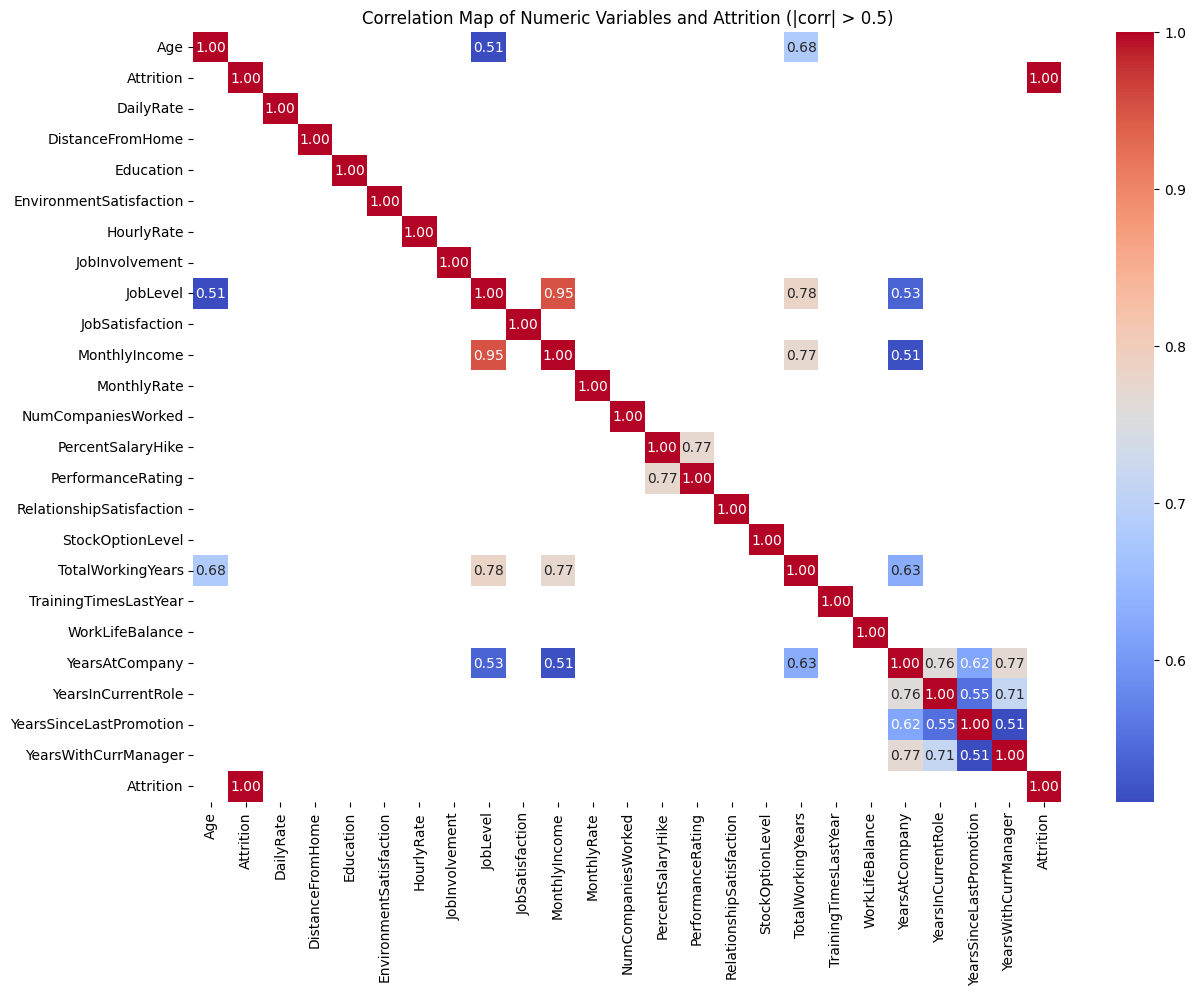

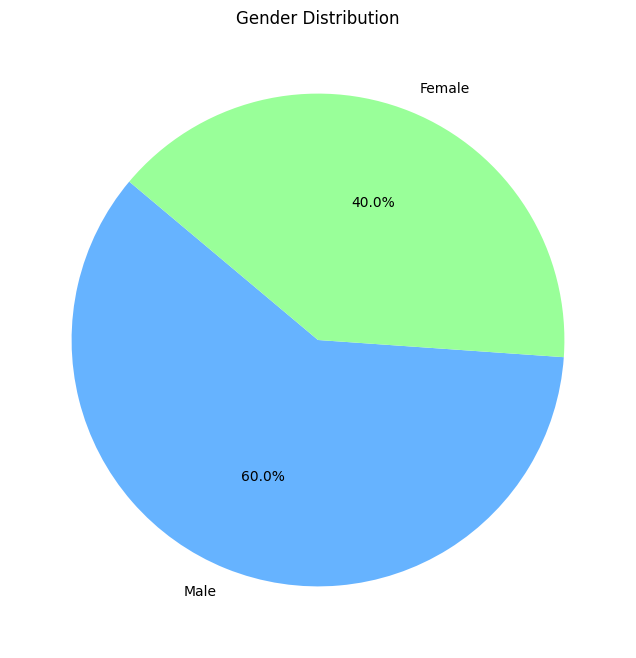

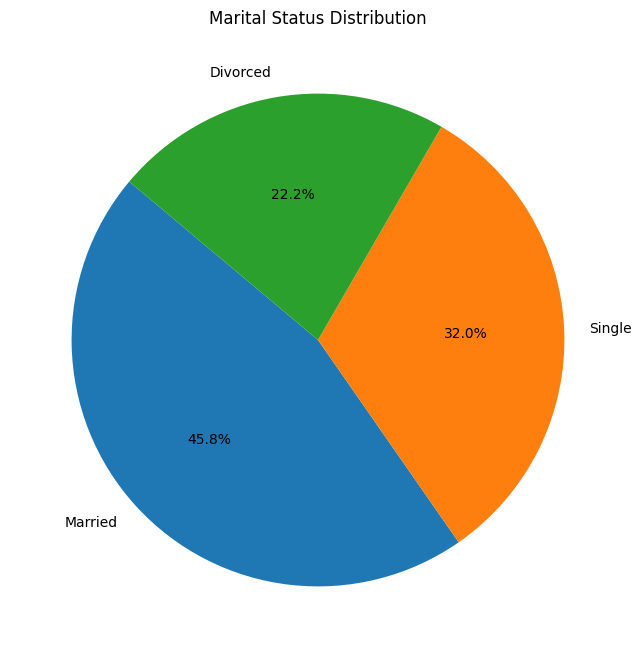

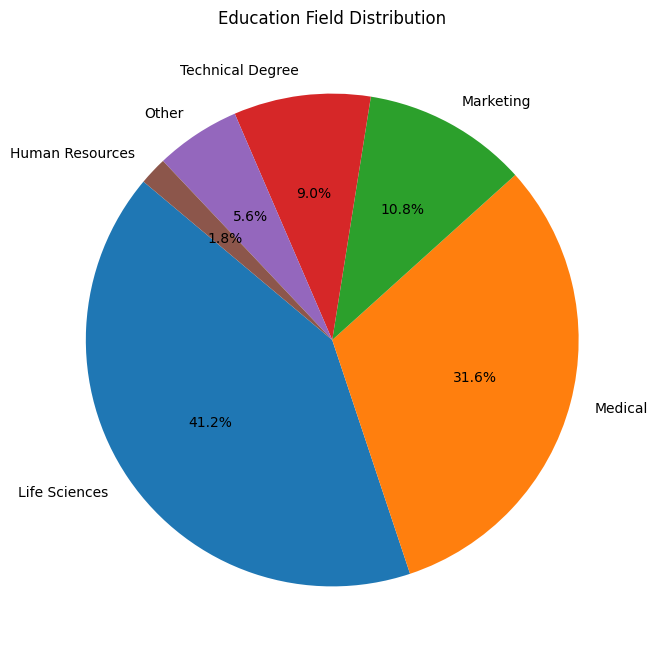

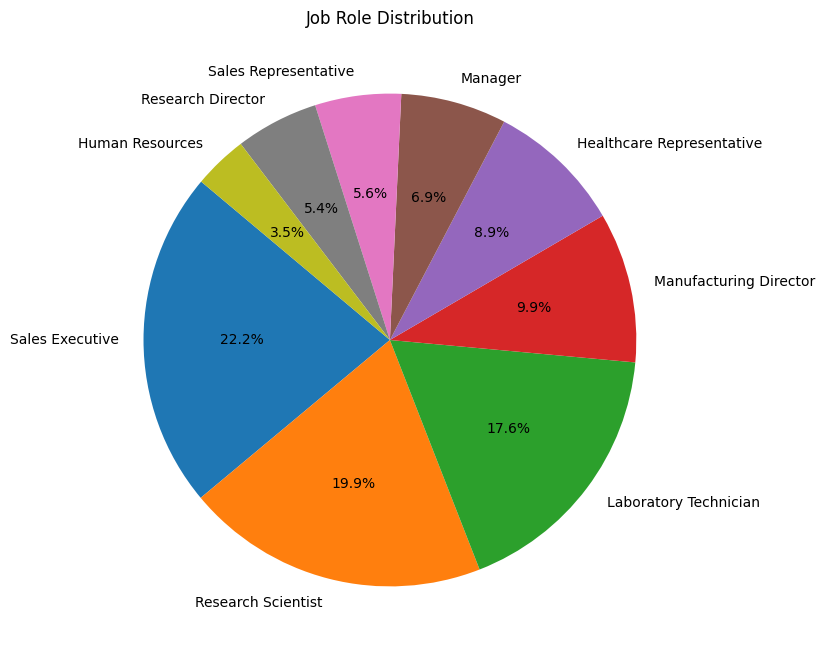

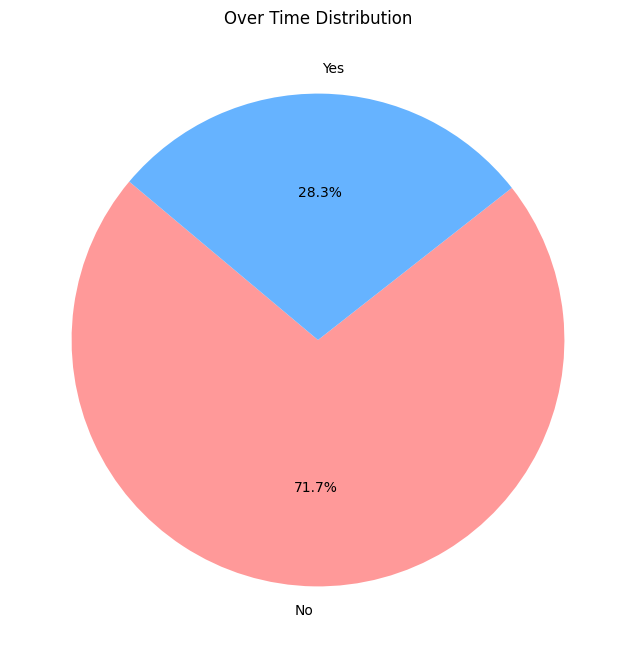

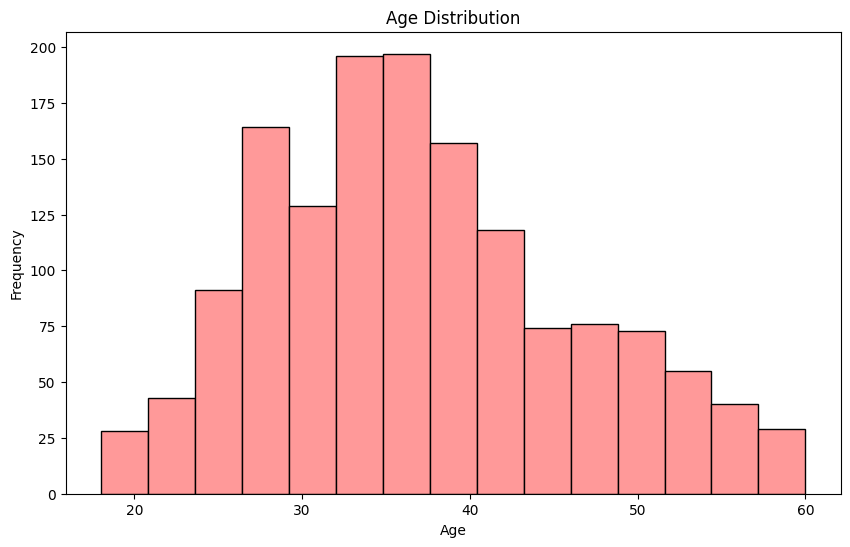

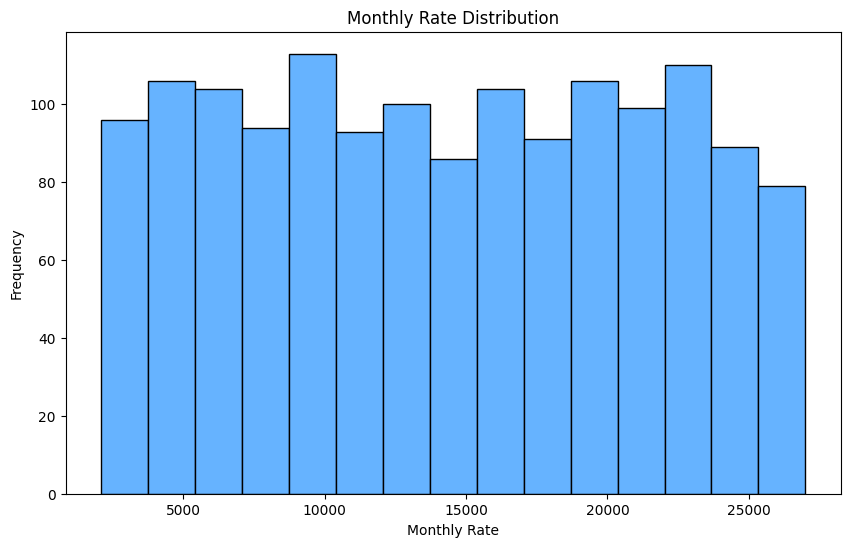

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,...,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0


In [6]:
# Preprocessing for Machine Learning

# Convert the Attrition column to binary (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify categorical columns to apply OHE
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding using pandas get_dummies
df_ohe = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the transformed dataframe
df_ohe.head()

# Separate numeric columns and include Attrition
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.append('Attrition')

# Apply Min-Max scaling to numeric columns
scaler = MinMaxScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Data Visualization

# Correlation map for numeric variables including Attrition
numeric_corr_matrix = df_numeric.corr()

# Filter the correlation matrix to show only correlations > 0.5 or < -0.5
filtered_numeric_corr_matrix = numeric_corr_matrix[(numeric_corr_matrix > 0.5) | (numeric_corr_matrix < -0.5)]

plt.figure(figsize=(14, 10))
sns.heatmap(filtered_numeric_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=filtered_numeric_corr_matrix.isnull(), cbar=True)
plt.title("Correlation Map of Numeric Variables and Attrition (|corr| > 0.5)")
plt.show()

# Pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=140)
plt.title('Gender Distribution')
plt.show()

# Pie chart for Marital Status distribution
marital_status_counts = df['MaritalStatus'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.show()

# Pie chart for Education Field distribution
education_field_counts = df['EducationField'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_field_counts, labels=education_field_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Field Distribution')
plt.show()

# Pie chart for Job Role distribution
job_role_counts = df['JobRole'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(job_role_counts, labels=job_role_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Role Distribution')
plt.show()

# Pie chart for Over Time distribution
overtime_counts = df['OverTime'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(overtime_counts, labels=overtime_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Over Time Distribution')
plt.show()

# Histogram for Age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, color='#ff9999', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for Monthly Rate distribution
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyRate'], bins=15, color='#66b3ff', edgecolor='black')
plt.title('Monthly Rate Distribution')
plt.xlabel('Monthly Rate')
plt.ylabel('Frequency')
plt.show()

# The processed dataset is now ready for machine learning
df_numeric.head()   

In [7]:
# List of categorical features to test against Attrition
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                        'JobRole', 'MaritalStatus', 'OverTime']

# Perform Chi-Square test
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Attrition'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[feature] = p

# Display p-values for each feature
for feature, p_value in chi2_results.items():
    print(f"Chi-Square Test for {feature}: p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"{feature} has a significant association with Attrition.\n")
    else:
        print(f"{feature} does not have a significant association with Attrition.\n")

Chi-Square Test for BusinessTravel: p-value = 0.0000
BusinessTravel has a significant association with Attrition.

Chi-Square Test for Department: p-value = 0.0045
Department has a significant association with Attrition.

Chi-Square Test for EducationField: p-value = 0.0068
EducationField has a significant association with Attrition.

Chi-Square Test for Gender: p-value = 0.2906
Gender does not have a significant association with Attrition.

Chi-Square Test for JobRole: p-value = 0.0000
JobRole has a significant association with Attrition.

Chi-Square Test for MaritalStatus: p-value = 0.0000
MaritalStatus has a significant association with Attrition.

Chi-Square Test for OverTime: p-value = 0.0000
OverTime has a significant association with Attrition.



In [9]:
# Concatenate the OHE and numeric DataFrames
df_final = pd.concat([df_numeric, df_ohe], axis=1)

# Display the first few rows of the combined DataFrame
df_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,False,False,False,False,False,True,False,False,True,True
1,0.738095,0.0,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,...,False,False,False,False,True,False,False,True,False,False
2,0.452381,1.0,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,True,False,False,False,False,False,False,False,True,True
3,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,False,False,False,False,True,False,False,True,False,True
4,0.214286,0.0,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,True,False,False,False,False,False,False,True,False,False
